In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [60]:
carbon = Chem.MolFromSmarts('[#6]')
crappy_atoms = Chem.MolFromSmarts('[#26,#27,#44]')

def is_crap(mol):
    if not mol.HasSubstructMatch(carbon):
        return True
    return mol.HasSubstructMatch(crappy_atoms)

In [61]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in suppl if m and not is_crap(m)]
len(drugbank)

RDKit WARNING: [14:13:17]  S group DAT ignored on line 2516
RDKit WARNING: [14:13:17]  S group DAT ignored on line 2516
RDKit WARNING: [14:13:17]  S group DAT ignored on line 2516
RDKit WARNING: [14:13:17]  S group DAT ignored on line 2516
RDKit WARNING: [14:13:17]  S group DAT ignored on line 15552
RDKit WARNING: [14:13:17]  S group DAT ignored on line 15552
RDKit WARNING: [14:13:17]  S group DAT ignored on line 15552
RDKit WARNING: [14:13:17]  S group DAT ignored on line 15552
RDKit ERROR: [14:13:17] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:13:17] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [14:13:17] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:13:17] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:13:17]  S group GEN ignored on line 102860
RDKit ERROR: [14:13:17] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:13:17]  Unhand

RDKit ERROR: [14:13:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:13:18] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [14:13:18] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [14:13:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [14:13:18] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:13:18] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [14:13:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:13:18] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [14:13:18] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [14:13:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [14:13:18] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERRO

RDKit ERROR: [14:13:18] ERROR: Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [14:13:18] Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [14:13:18] ERROR: Could not sanitize molecule ending on line 645068
RDKit ERROR: [14:13:18] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [14:13:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:13:18] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [14:13:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:13:19]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [14:13:19] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:13:19] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [14:13:19] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
R

6996

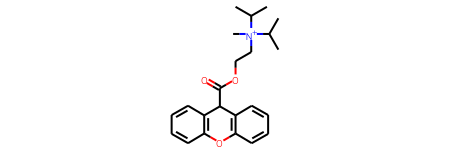

In [6]:
m = drugbank[666]
m

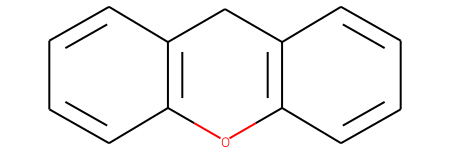

In [9]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(m)
scaffold1

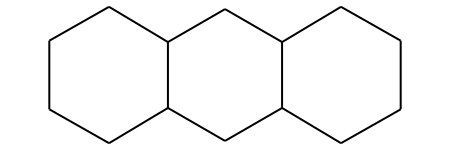

In [11]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

In [72]:
scaffolds2count = {}
for i, mol in enumerate(drugbank):
    Chem.rdmolops.RemoveStereochemistry(mol)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
    smiles = Chem.MolToSmiles(scaffold3)
    try:
        scaffolds2count[smiles] += 1
    except KeyError:
        scaffolds2count[smiles] = 1

In [73]:
len(scaffolds2count)

1542

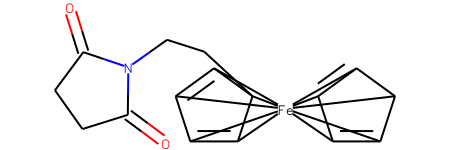

In [59]:
drugbank[1462]

In [74]:
scaffolds2count

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': 2,
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': 2,
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': 3,
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': 2,
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': 1,
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': 1,
 'C1CCCCC1': 1038,
 'C1CCC(CCC2CCC3CCCCC3C2)CC1': 54,
 'C1CCCC1': 188,
 'C1CCC2C(C1)CCC2C1CCCC1': 166,
 '': 902,
 'C1CC2CCCC2C1': 15,
 'C1CCC(CCC2CCCC3CCCC32)CC1': 28,
 'C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1': 2,
 'C1CCC2CC3CCCCC3CC2C1': 57,
 'C1CCC2CCCC2C1': 192,
 'C1CCC(CC2CCCC2)CC1': 73,
 'C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1': 17,
 'C1CCC2CCCCC2C1': 169,
 'C1CCC(C2CCCCC2C2CCCC2)CC1': 1,
 'C(CCCC1CCC2CCCC12)CCC1CCCCC1': 2,
 'C1CCC(CCCCC2CCCCC2)CC1': 53,
 'C1CCC2C(C1)CCC1C2CCC2C3CCCC3CC21': 8,
 'C(CCCCCCC1CCC2CCCCC12)CCCCCC1C

In [75]:
scaffold_smiles = sorted(scaffolds2count.items(), key=lambda x: x[1], reverse=True)

In [70]:
scaffold_smiles[:10]

[('C1CCCCC1', 957),
 ('', 902),
 ('C1CCC(CC2CCCCC2)CC1', 142),
 ('C1CCCC1', 138),
 ('C1CCC2CCCC2C1', 132),
 ('C1CCC2C(C1)CCC2C1CCCC1', 130),
 ('C1CCC2CCCCC2C1', 102),
 ('C1CCC(C2CCCCC2)CC1', 85),
 ('CC1CCC2C(CCC3C4CCCC4CCC23)C1', 77),
 ('C1CCC(C2CCCC2)CC1', 60)]

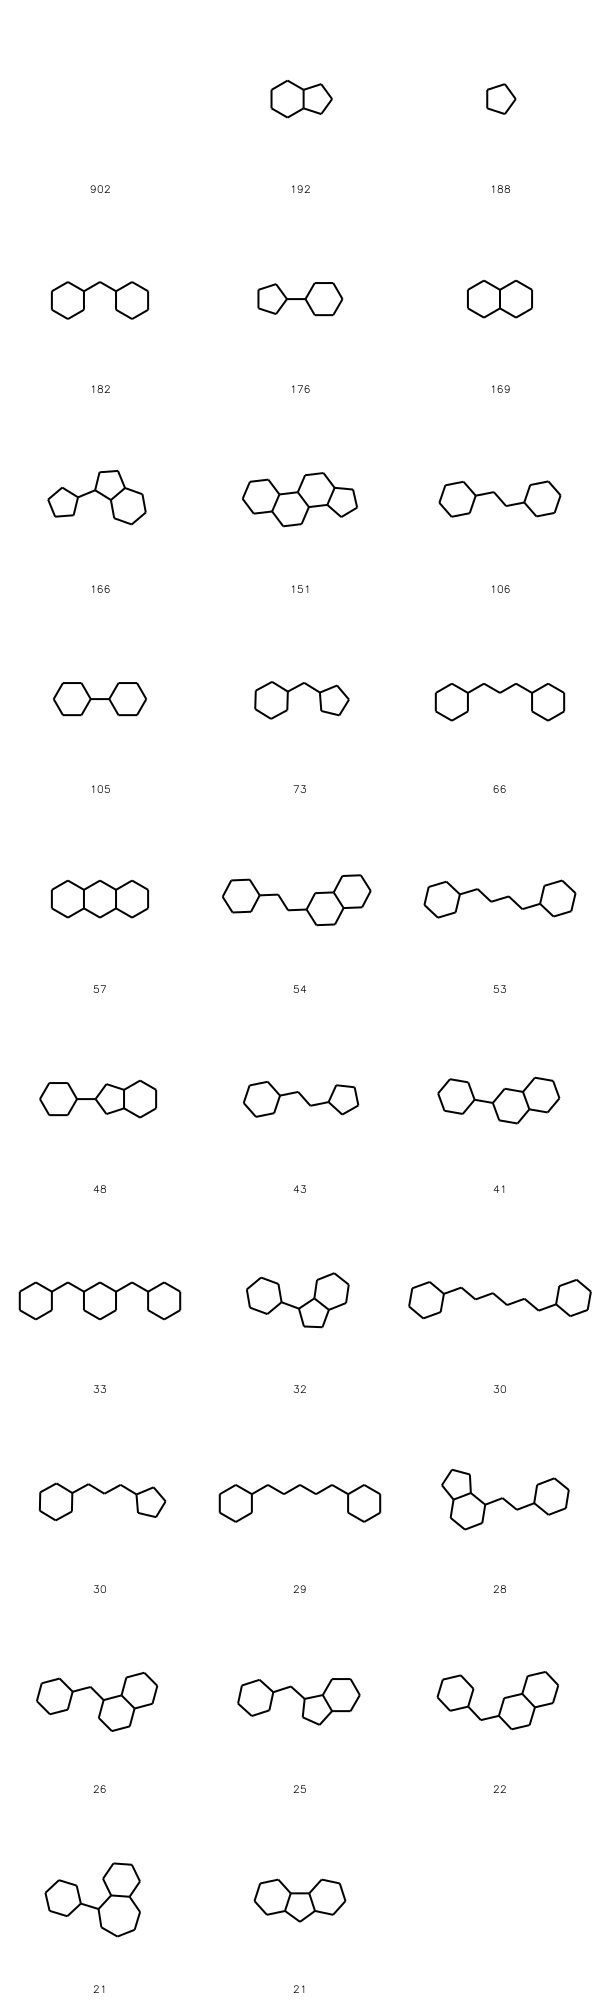

In [76]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi, count in scaffold_smiles[1:30]],
                     legends=[str(count) for smi, count in scaffold_smiles[1:30]])

In [31]:
dalmatines = scaffold_smiles[3][0]
dalmatines

'c1ncc2ncn(C3CCCO3)c2n1'

In [32]:
scaffolds = [Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)) for mol in drugbank]
scaffolds[:10]

['O=C(CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)C1CCCN1C(=O)CCc1ccccc1)NCCc1ccccc1',
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1cnc[nH]1)NC(=O)C1CCC(=O)N1)NCC(=O)N1CCCC1',
 'O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCSSCC(C(=O)N2CCCC2)NC(=O)CN1',
 'O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(Cc1cccnc1)NC(=O)C(Cc1ccccc1)NC(=O)CCc1ccc2ccccc2c1)NCC(=O)N1CCCC1',
 'O=C1CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CN1',
 'O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCSSCC(C(=O)N2CCCC2)NC(=O)CN1',
 'O=C1CNC(=O)CNC(=O)C(Cc2c[nH]c3ccccc23)NC(=O)C(Cc2ccccc2)NC(=O)C(NC(=O)CCc2ccccc2)CSSCCN1',
 'c1ccncc1',
 'O=C1CCC2CC3C4CCC5=N4~[Co]46(N3C2=CC2=N~4C(=CC3=N~6C(=C5)CC3)CC2)~n2cn(c3ccccc32)C2CC(CO2)O[PH](=O)OCCN1',
 'O=c1nc[nH]c2c1NC(CNc1ccccc1)CN2']

In [33]:
dalmatine_structures = [mol for mol, scaffold in zip(drugbank, scaffolds) if scaffold == dalmatines]
len(dalmatine_structures)

101

In [35]:
[mol.GetProp('GENERIC_NAME') for mol in dalmatine_structures]

['S-Adenosylmethionine',
 'Adenosine monophosphate',
 'Adenosine triphosphate',
 'Vidarabine',
 'Cladribine',
 'Clofarabine',
 'Adenosine',
 'Fludarabine',
 'Nelarabine',
 "Adenosine-5'-Diphosphate Monothiophosphate",
 'Methacrylyl-Coenzyme A',
 'S-Adenosyl-L-Homocysteine',
 "N-[Isoleucinyl]-N'-[Adenosyl]-Diaminosufone",
 "Adenosine-3'-5'-Diphosphate",
 'Desulfo-Coenzyme A',
 "3'-Phosphate-Adenosine-5'-Diphosphate",
 'Oxidized Coenzyme A',
 'Cordycepin Triphosphate',
 "Aspartyl-Adenosine-5'-Monophosphate",
 'Sinefungin',
 'Trifluoroacetonyl Coenzyme A',
 'Coenzyme A',
 "Adenosine-2'-5'-Diphosphate",
 '2-Chlorodideoxyadenosine',
 "5'-O-(N-Ethyl-Sulfamoyl)Adenosine",
 'Myristoyl-Coa',
 "Adenosine-5'-Ditungstate",
 "2',3'-Dideoxyadenosine-5'-Triphosphate",
 'S-(2-Oxo)Pentadecylcoa',
 "5'-Deoxy-5'-Methylthioadenosine",
 "Adenosine-5'-Rp-Alpha-Thio-Triphosphate",
 "2'-Monophosphoadenosine-5'-Diphosphate",
 'Adenosine Monotungstate',
 '5-(6-Amino-9h-Purin-9-Yl)-4-Hydroxytetrahydrofuran-3-Yl 

In [78]:
# Let's make a library - one random structure for each scaffold
scaffolds2mols = {}
for mol in drugbank:
    Chem.rdmolops.RemoveStereochemistry(mol)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold)
    scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
    smiles = Chem.MolToSmiles(scaffold3)
    try:
        scaffolds2mols[smiles].append(mol)
    except KeyError:
        scaffolds2mols[smiles] = [mol]

In [82]:
import random
picked = [random.choice(mols) for scaffold, mols in scaffolds2mols.items()]
len(picked)

1542

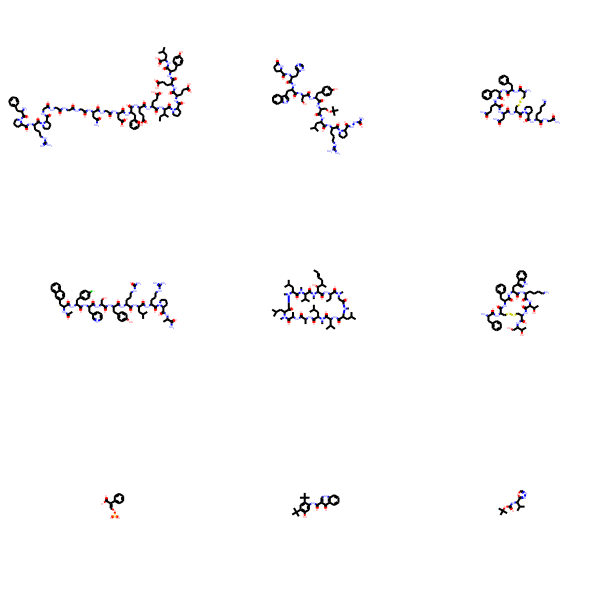

In [86]:
Draw.MolsToGridImage(picked[:9])